
# Project: Investigating the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB stands for The Movie Database, it is a popular database for movies and tv shows. The dataset contains:

> 1. Rows = 10866 
> 2. Columns = 21

> Some of the features of the dataset include; imdb_id, popularity, budget, cast, director, revenue, e.t.c.

## Questions from the dataset
> 1. Which movie has the highest and lowest profit
> 2. The number/count of movies produced over the years

In [41]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data will be loaded, I will check if the data is dirty, and clean it, I will also trim the dataset for analysis.

### General Properties

In [42]:
# Loading the data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
#Checking the number of movies and their attributes:

print(f"Number of Movies are: {df.shape[0]}")
print(f"Number of Movie Attributes are: {df.shape[1]}")

Number of Movies are: 10866
Number of Movie Attributes are: 21


In [44]:
# Descriptive statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the summary above, we can see that there are alot of null values, the following columns/features have null values:
> 1. imdb_id
> 2. cast
> 3. homepage
> 4. director
> 5. tagline
> 6. keywords
> 7. overview
> 8. genres
> 9. production companies

In [46]:
df.shape

(10866, 21)

#### Observation 1
> After investigating the dataset, I discovered the dataset is dirty and I was able to come up with the following conclusions:

In [47]:
# This are the total number of null values of the columns with missing values
print(f"1. imdb_id has {df['imdb_id'].isnull().sum()} null values")
print(f"2. cast has {df['cast'].isnull().sum()} null values")
print(f"3. homepage has {df['homepage'].isnull().sum()} null values")
print(f"4. director has {df['director'].isnull().sum()} null values")
print(f"5. tagline has {df['tagline'].isnull().sum()} null values")
print(f"6. keywords has {df['keywords'].isnull().sum()} null values")
print(f"7. overview has {df['overview'].isnull().sum()} null values")
print(f"8. genres has {df['genres'].isnull().sum()} null values")
print(f"9. production companies has {df['production_companies'].isnull().sum()} null values")

1. imdb_id has 10 null values
2. cast has 76 null values
3. homepage has 7930 null values
4. director has 44 null values
5. tagline has 2824 null values
6. keywords has 1493 null values
7. overview has 4 null values
8. genres has 23 null values
9. production companies has 1030 null values


In [48]:
def check_null_visuals():
    ax = plt.axes()
    sns.heatmap(df.isna());
    ax.set_title("Columns with Missing Values");

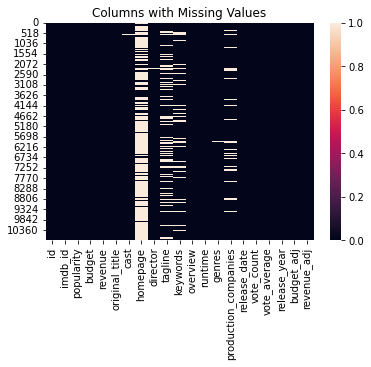

In [49]:
check_null_visuals()

### Data Cleaning 

#### Observation 2
> The columns with the most missing values can be dropped, such as; homepage, tagline and keywords. They have over 1000 missing values and do not really influence or have much impact in the data, so they can be dropped 

In [50]:
# Dropping homepage, tagline and keywords columns
df.drop(["homepage", "tagline", "keywords"], axis="columns", inplace=True)

In [51]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [52]:
# Dropping columns of little or no importance
df.drop(["imdb_id", "production_companies", "release_date", "budget_adj", "revenue_adj"], axis="columns", inplace=True)

In [53]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [54]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2947,7.3,2015


In [55]:
# Checking if there are still null values
df.isnull().count()

id                10866
popularity        10866
budget            10866
revenue           10866
original_title    10866
cast              10866
director          10866
overview          10866
runtime           10866
genres            10866
vote_count        10866
vote_average      10866
release_year      10866
dtype: int64

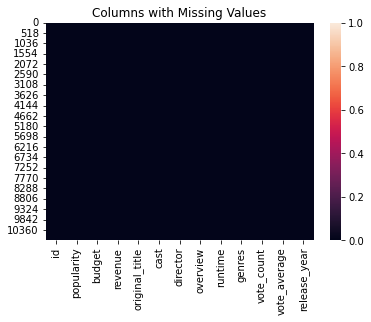

In [56]:
check_null_visuals()

> There are no more null values anymore. Therefore, the dataset has been cleaned. 
> I will now move to exploring the data, visualizing and answering the questions raised from the first section

In [57]:
# Checking the data type of the dataset
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
overview           object
runtime             int64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [58]:
# Convert budget and revenue to float
df[["budget", "revenue"]] = df[["budget", "revenue"]].astype(float)

In [59]:
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
overview           object
runtime             int64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [60]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Question 1: Which movie has the highest profit?

> To calculate the highest and lowest profit, A new column has to be created, the column will be called profit_earned, and it consists of the difference between the revenue and budget

In [61]:
df.insert(2,'profit_earned',df['revenue'] - df['budget'])

In [62]:
df.head()

,id,popularity,profit_earned,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2947,7.3,2015


In [63]:
# Checking the highest / maximum value of profit earned
df.profit_earned.max()

2544505847.0

In [64]:
# Checking the lowest / minimum value of profit earned
df.profit_earned.min()

-413912431.0

In [65]:
# Index of the row with highest profit earned
df.profit_earned.idxmax()

1386

In [66]:
# Index of the row with lowest profit earned
df.profit_earned.idxmin()

2244

In [67]:
# Storing the index of the mqximum value earned
high = df["profit_earned"].idxmax()

In [68]:
# Storing the index of the mqximum value earned
low = df["profit_earned"].idxmin()

In [69]:
# Creating a dataframe and storing the features of the highest profit earned
high_df = pd.DataFrame(df.loc[high])

In [70]:
# Creating a dataframe and storing the features of the lowest profit earned
low_df = pd.DataFrame(df.loc[low])

In [71]:
high_df

,1386
id,19995
popularity,9.432768
profit_earned,2544505847.0
budget,237000000.0
revenue,2781505847.0
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
overview,"In the 22nd century, a paraplegic Marine is di..."
runtime,162


In [72]:
low_df

,2244
id,46528
popularity,0.25054
profit_earned,-413912431.0
budget,425000000.0
revenue,11087569.0
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
overview,An Asian assassin (Dong-gun Jang) is forced to...
runtime,100


In [73]:
profit_check_df = pd.concat([high_df, low_df], axis=1)

In [74]:
profit_check_df

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
profit_earned,2544505847.0,-413912431.0
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100


### Answer  to Question 1

> 1. Highest Profit: AVATAR
> 2. Lowest Profit: THE WARRIOR'S WAY

###  Question 2: The number/count of movies produced over the years

In [75]:
df['release_year'].value_counts().head()

2014    700
2013    659
2015    629
2012    588
2011    540
Name: release_year, dtype: int64

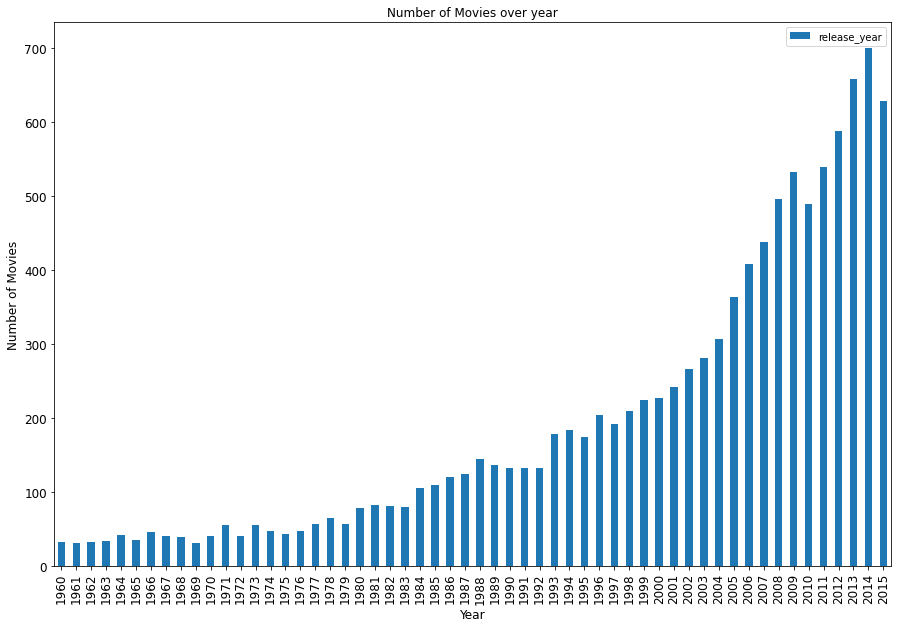

In [76]:
ax = df['release_year'].value_counts().sort_index().plot(kind='bar', title ="Number of Movies over year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Movies", fontsize=12)
plt.show()

### Answer  to Question 2

> Highest number of Movies produced in a year : 2014
> We also observe that the number of Movies produced in a single year increased from 1999 / 2000. 

<a id='conclusions'></a>
## Conclusions

#### Question : Which genre of movie will I suggest to be produced?
#### Answer : Action movies as well as Adventure movies is highly recommended. The reason is that most of the movies that made the most profit and highly rated are Action and Adventure

#### Limitations

> 1. There is no information about the currency of budget and revenue. It is assumed that all movies have the same currency.
> 2. The data provided might not be absolutely accurate.